In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('sales.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [5]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [6]:
df=df.drop(['Month'],axis=1)

In [7]:
df.tail()

,Sales
100,4618
101,5312
102,4298
103,1413
104,5877


In [8]:
# df.drop(105,axis=0,inplace=True)

In [9]:
df.tail()

,Sales
100,4618
101,5312
102,4298
103,1413
104,5877


In [10]:
# Convert Month into Datetime
# df['Month']=pd.to_datetime(df['Month'])

In [11]:

df.head()

,Sales
0,2815
1,2672
2,2755
3,2721
4,2946


In [12]:
# set month column as an index
# df.set_index('Month',inplace=True)

In [13]:
df.head()

,Sales
0,2815
1,2672
2,2755
3,2721
4,2946


In [14]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

<Axes: >

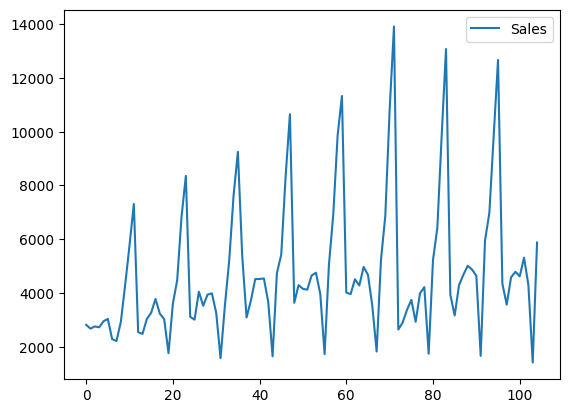

In [15]:
df.plot()

In [16]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    
    if result[1] <= 0.05:
        print("is stationary")
    else:
        print("is non-stationary ")
    

In [18]:
adfuller_test(df)

is non-stationary 


## Differencing ( target to make stationary)

In [19]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [20]:
adfuller_test(df['Sales First Difference'].dropna())

is stationary


In [21]:
df=df.dropna()

In [22]:
df.head(4)

,Sales,Sales First Difference
12,2541,-274.0
13,2475,-197.0
14,3031,276.0
15,3266,545.0


In [28]:
df= df.drop(['index'],axis=1)

In [27]:
df=df.reset_index()

In [29]:
df.head()

,Sales First Difference
0,-274.0
1,-197.0
2,276.0
3,545.0
4,830.0


In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [ ]:
df.head()

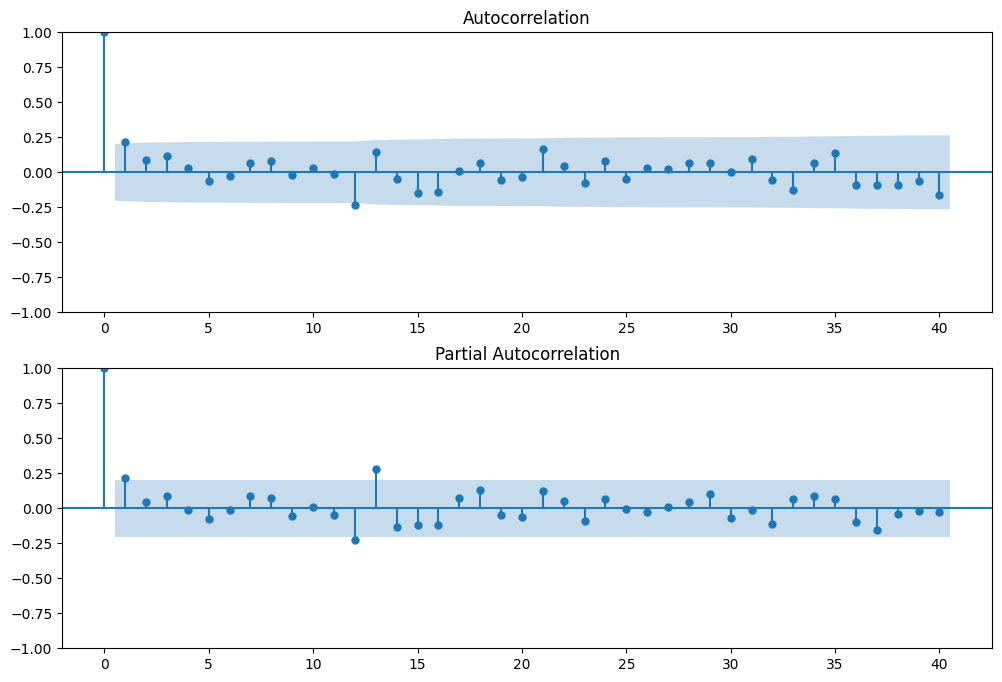

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df,lags=40,ax=ax2)

In [32]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [33]:
autoarima_model = auto_arima(df, trace=True)
print(autoarima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1500.884, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1498.453, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1498.864, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1511.271, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1500.270, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1500.341, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1502.216, Time=0.38 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1503.527, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.601 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   93
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -746.227
Date:                Thu, 18 Jan 2024   AIC           

<Axes: >

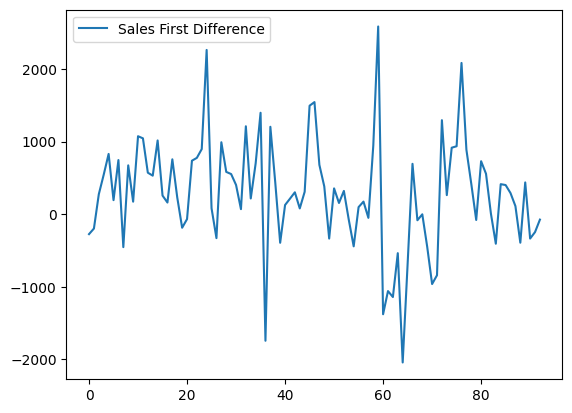

In [40]:
df.plot()

In [34]:
size = int(len(df) * 0.85)
train = df[:size]
test = df[size:]

In [45]:
test.head(10)

,Sales First Difference
79,-79.0
80,730.0
81,557.0
82,9.0
83,-406.0
84,414.0
85,402.0
86,291.0
87,112.0
88,-392.0


In [61]:
model=ARIMA(train,order=(1,0,1))#,seasonal_order=(1,0,1,12))
results=model.fit()

# Predict only test equivalent values

In [62]:
prediction=results.predict(start=len(train),end=len(df)-1,dynamic=True)

In [63]:
abs(prediction-test['Sales First Difference'])

79    504.621274
80    353.272366
81    206.969890
82    326.452390
83    733.492479
84     90.853893
85     81.227154
86     28.476969
87    206.769377
88    710.383009
89    119.827961
90    653.056843
91    563.993942
92    391.959596
dtype: float64

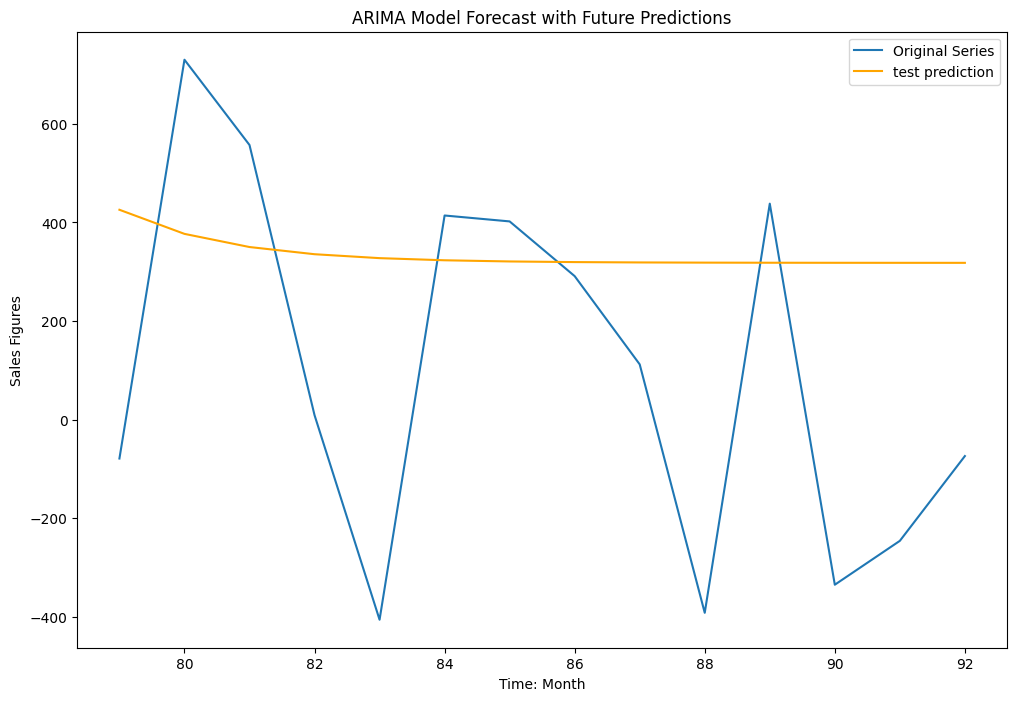

In [64]:
plt.figure(figsize=(12, 8))
plt.plot(test['Sales First Difference'], label='Original Series')
plt.plot(prediction, color='orange', label='test prediction')
plt.title('ARIMA Model Forecast with Future Predictions')
plt.xlabel('Time: Month')
plt.ylabel('Sales Figures')
plt.legend()
plt.show()

# error calculation

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test.mean()

Sales First Difference    101.5
dtype: float64

In [66]:
rmse= sqrt(mean_squared_error(prediction,test['Sales First Difference']))
rmse

# mse= mean_squared_error(test,prediction)
# mse

426.1528224507803

# Future forecasting

In [67]:
# future_datest_df=pd.DataFrame(index=future_dates[0:])


future_datest_df=pd.date_range(start='1972-09-01',end='1974-08-01' , freq='MS')
# future_datest_df=pd.DataFrame(index=future_datest_df)
# future_datest_df.head(20)

In [68]:
future_datest_df

DatetimeIndex(['1972-09-01', '1972-10-01', '1972-11-01', '1972-12-01',
               '1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
               '1973-09-01', '1973-10-01', '1973-11-01', '1973-12-01',
               '1974-01-01', '1974-02-01', '1974-03-01', '1974-04-01',
               '1974-05-01', '1974-06-01', '1974-07-01', '1974-08-01'],
              dtype='datetime64[ns]', freq='MS')

In [69]:
future_datest_df = results.predict(start = 104, end = 120, dynamic= True)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


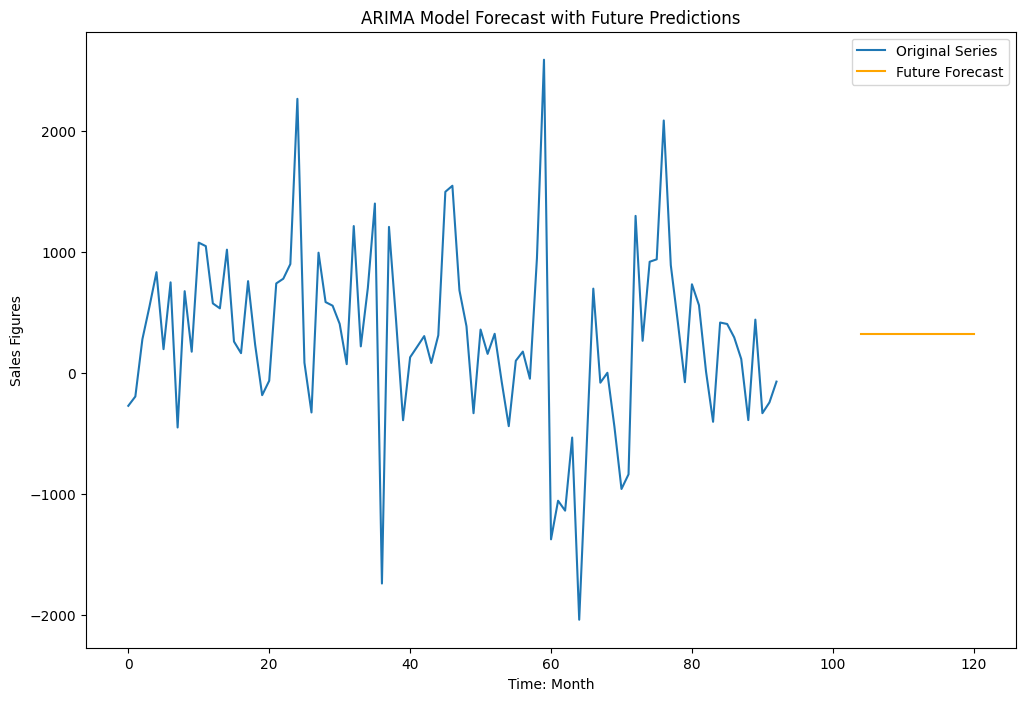

In [70]:
plt.figure(figsize=(12, 8))
plt.plot(df, label='Original Series')
plt.plot(future_datest_df, color='orange', label='Future Forecast')
plt.title('ARIMA Model Forecast with Future Predictions')
plt.xlabel('Time: Month')
plt.ylabel('Sales Figures')
plt.legend()
plt.show()